In [1]:
#Exercise 9
import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
%matplotlib inline

Global minimal is: 
       fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


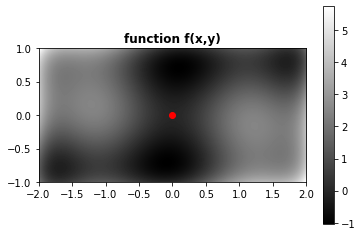

'How many global minima are there, and what is the function value at those points?'

In [2]:
#Exercise 1
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return (4 - 2.1 * x[0]**2 + (x[0]**4/3))* x[0]**2 + x[0]*x[1] + (4* x[1]**2 - 4) * x[1]**2 

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)
xm, ym = np.meshgrid(x,y)
z= f([xm,ym])

extent = np.min(x), np.max(x), np.min(y), np.max(y)
plt.imshow(z,  cmap ="binary_r", interpolation ='bilinear', extent = extent)
plt.title('function f(x,y)', fontweight ="bold")
plt.colorbar()


minimal = optimize.minimize(f, x0= [0,0])
print("Global minimal is: \n", minimal)
plt.scatter(minimal['x'][0], minimal['x'][1], c='r')
plt.show()

"How should I count the global minima of a function?!!!"
"How many global minima are there, and what is the function value at those points?"

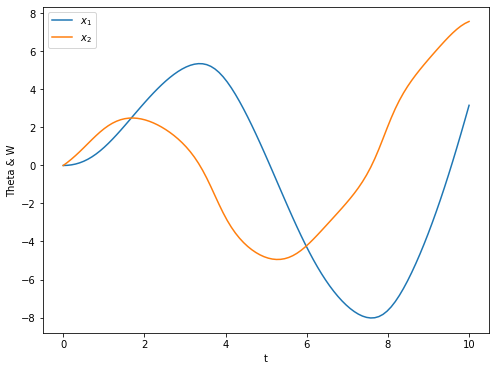

In [4]:
#Exercise 2
from scipy.integrate import odeint

#initialization
Q = 2
d=1.5
omega= 0.65

def derivative(X, time, d, omega):
    return(X[1], -(1/Q) * X[0] + np.sin(X[1]) + d * np.cos(omega*time))

t = np.linspace(0, 10, 100)
Xinit = (0, 0)
X = odeint(derivative, Xinit, t, args=(d, omega))

# plot y and y'
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="$x_1$")
plt.plot(t, X[:, 1], label="$x_2$")
plt.xlabel('t')
plt.ylabel('Theta & W')
plt.legend(loc='best')

sample_freq:
 [ 0.          0.04761905  0.0952381   0.14285714  0.19047619  0.23809524
  0.28571429  0.33333333  0.38095238  0.42857143  0.47619048 -0.47619048
 -0.42857143 -0.38095238 -0.33333333 -0.28571429 -0.23809524 -0.19047619
 -0.14285714 -0.0952381  -0.04761905]


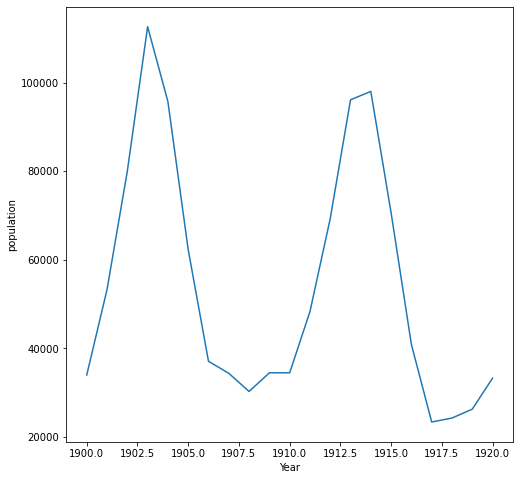

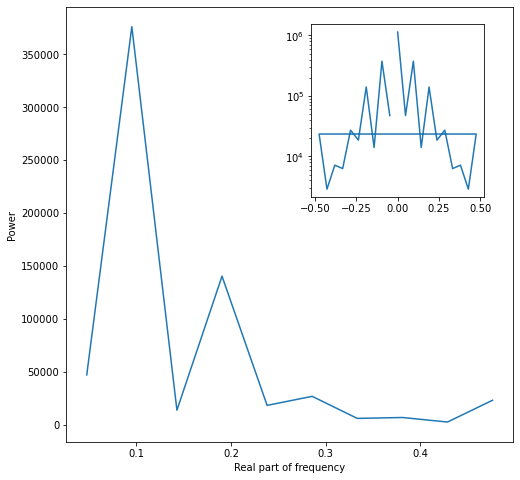

In [5]:
#Exercise 3
#FFT of a simple dataset
import matplotlib.pyplot as plt
from scipy import fftpack
import numpy as np
import pandas as pd

#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

data = pd.read_csv("data/populations.txt", sep='\t')
#print(data)
#sum population of 2 animals
data['pavg'] = (data['hare'] + data['lynx'])
#print(data)

# get the numpy[]
year = data['# year'].to_numpy()
pop = data['pavg'].to_numpy()

# Plot data
fig = plt.figure(figsize=(8,8))
plt.plot(year, pop)
plt.xlabel('Year')
plt.ylabel('population')

# The FFT of the signal
sig_fft = fftpack.fft(pop)
#print(sig_fft)
# The power
power = np.abs(sig_fft)
#print(power)

# get the frequencies
time_step = 1 # 1 year
sample_freq = fftpack.fftfreq(len(pop), d=time_step)
print("sample_freq:\n" , sample_freq)

#  get real part of frequency
i = sample_freq>0
#print(i)

# plot real freq..
fig = plt.figure(figsize=(8,8))
plt.plot(sample_freq[i], power[i])
plt.xlabel("Real part of frequency")
plt.ylabel("Power")

# add inner plot of all frequencies
axes= plt.axes([0.55, 0.55, 0.3, 0.3])
plt.plot(sample_freq, power)
plt.setp(axes, yticks=[])
plt.yscale('log')

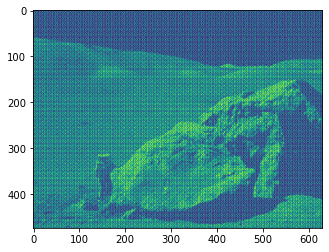

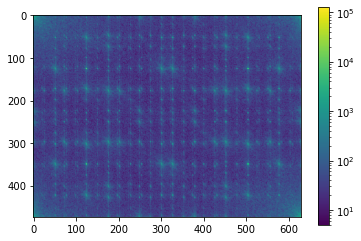

Text(0.5, 1.0, 'Resulting Image')

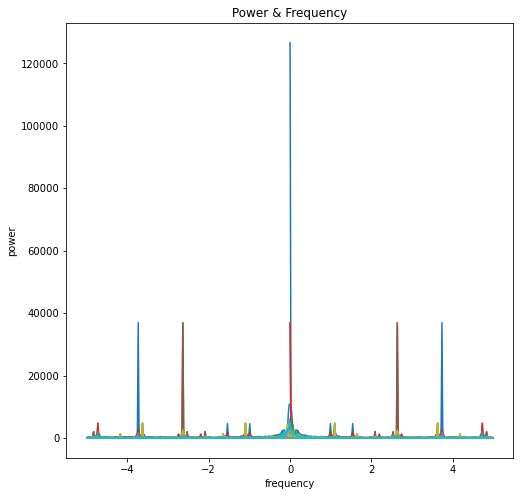

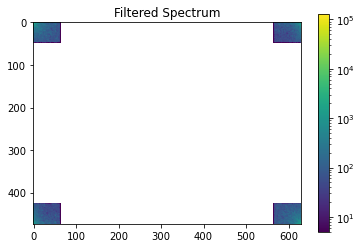

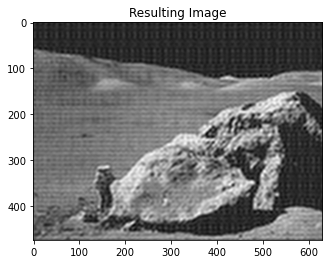

In [6]:
#Exercise 4
#FFT of an image
from scipy import fftpack

img = plt.imread("images/moonlanding.png")
plt.imshow(img)
plt.show()

fft2 = fftpack.fft2(img)
power = np.abs(fft2)
from matplotlib.colors import LogNorm
plt.imshow(power, norm=LogNorm(vmin=5))
plt.colorbar()
plt.show()

# The return the corresponding frequencies
time_step = 0.1
sample_freq = fftpack.fftfreq(len(img), time_step)

# plot abs & freq
fig = plt.figure(figsize = (8,8))
plt.plot(sample_freq, power)
plt.title('Power & Frequency')
plt.xlabel('frequency')
plt.ylabel('power')

# Find the peak frequency: positive frequencies
mask = np.where(sample_freq > 0)
freqs = sample_freq[mask]
powes= power[mask]

#Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those
#which contain the periodic noise. Use array slicing to set the noise regions to zero.
keep_fraction = 0.1
im_fft2 = fft2.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0
plt.figure()
plt.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

#Apply the inverse Fourier transform to plot the resulting image.
fft2_new = fftpack.ifft2(im_fft2).real
plt.figure()
plt.imshow(fft2_new, plt.cm.gray)
plt.title('Resulting Image')